In [1]:
from tensorflow.keras.layers import Dense,Concatenate,Input
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [2]:
init=tf.keras.initializers.he_uniform(seed=5)
checkpoint_filepath='Weights\\best.h5'

In [3]:
def model_ind(input_shape,n_classes):
    inp=keras.Input(shape=input_shape)
    x=Dense(units=64,kernel_initializer=init,activation='relu')(inp)
    x=Dense(units=64,kernel_initializer=init,activation='relu')(x)
    x=Dense(units=input_shape[0])(x)
    
    model=keras.Model(inp,x)
    return model

In [4]:
#importing actual image data and edge image data
df1=pd.read_csv('imageData2_ASL_fingerspell.csv')
df2=pd.read_csv('imageData4_ASL_fingerspell.csv')

In [5]:
df1=df1.iloc[:,1:]
df2=df2.iloc[:,1:]

In [6]:
#creating separate models for original and edge image
n_classes_1=len(np.unique(df1.iloc[:,-1]))
n_classes_2=len(np.unique(df2.iloc[:,-1]))
shape_1=(df1.shape[1]-1,)
shape_2=(df2.shape[1]-1,)
m_1=model_ind(shape_1,n_classes_1)
m_2=model_ind(shape_2,n_classes_2)

In [7]:
input_1=keras.Input(shape=shape_1)
input_2=keras.Input(shape=shape_2)
out_1=m_1(input_1)
out_2=m_2(input_2)

In [8]:
#combining both models
concat=Concatenate()([out_1,out_2])
x=Dense(units=64,kernel_initializer=init,activation='relu')(concat)
x=Dense(units=64,kernel_initializer=init,activation='relu')(concat)
x=Dense(units=n_classes_1,activation='softmax')(x)

model=keras.Model([input_1,input_2],x)

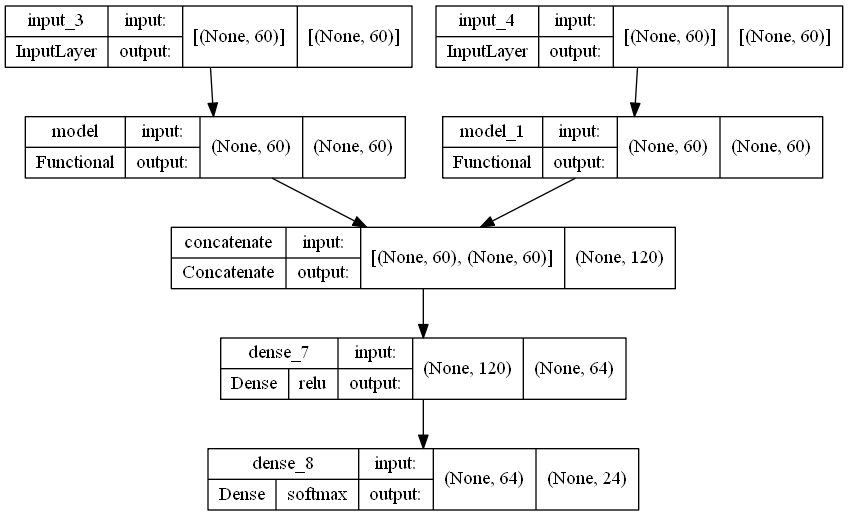

In [9]:
tf.keras.utils.plot_model(model,show_shapes=True,
    show_layer_names=True,show_layer_activations=True)

In [10]:
df=df1.iloc[:,:-1]
df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-76.459435,-26.913967,17.529585,4.246235,-19.020369,14.484635,4.289009,5.588086,8.945319,-14.517418,...,-1.572458,-4.614069,-3.579037,-2.237944,4.760138,-2.071990,0.212440,-2.019225,-1.750822,1.482691
1,-78.621690,-28.683860,11.410357,-1.724810,-16.433876,11.529416,4.013988,6.853178,8.448888,-12.821294,...,-1.766760,-5.809831,-2.389093,-2.543576,5.844628,-2.809917,0.622563,-2.267408,-1.246673,1.613947
2,-75.415370,-29.959194,14.634181,3.606216,-17.629555,13.449083,3.915278,7.636108,10.431758,-12.434543,...,-2.411270,-4.812909,-3.671381,-2.714393,4.646678,-2.474073,0.150904,-1.560906,-2.134156,1.448035
3,-70.117935,-30.968111,16.155874,7.408560,-19.290873,15.180797,10.079274,8.980095,11.221203,-16.209541,...,-2.289368,-4.199786,-4.404840,-2.953729,4.821172,-2.677749,-0.076440,-1.768802,-1.415738,1.252140
4,-79.617290,-26.315582,11.712108,-0.141238,-16.221490,10.624370,0.297059,5.675777,8.822520,-12.999238,...,-1.575378,-5.601185,-2.812563,-2.513482,5.581704,-2.499778,-0.131862,-2.049859,-1.223977,1.489298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65769,-49.547870,4.765029,35.464390,18.961212,9.149959,57.429962,21.348950,16.657358,-7.429802,-34.273434,...,7.679408,1.675702,2.138483,1.627827,-0.704653,3.648490,-0.961833,4.739782,-0.838270,-4.129395
65770,-53.772884,-2.916336,24.792027,32.012794,2.903626,29.312487,14.833857,23.936985,-19.420284,-6.770403,...,6.558447,1.154598,-2.194972,0.369120,-0.974764,0.686060,7.684798,1.285345,5.752082,4.791821
65771,-54.904568,1.378796,27.805613,28.699068,2.141600,31.016264,14.891136,20.825466,-20.446945,-9.029523,...,6.204559,0.523178,-3.913568,-0.299327,-0.623644,1.389398,7.027829,1.360098,4.509905,4.433050
65772,-51.692130,-3.206917,14.159138,25.616657,6.471990,35.610115,11.707020,26.483720,-24.797148,-6.628719,...,6.746383,0.598981,-5.821737,-1.859566,0.577862,2.994483,5.540817,3.081182,3.662135,4.269991


In [11]:
for i in range(60,60+df2.shape[1]):
    l=list(df2.iloc[:,i-60])
    df[str(i+1)]=l
df

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,121
0,-76.459435,-26.913967,17.529585,4.246235,-19.020369,14.484635,4.289009,5.588086,8.945319,-14.517418,...,-0.203759,-0.141670,1.967479,1.234131,0.844917,-1.264223,-0.147950,2.805220,1.698498,a
1,-78.621690,-28.683860,11.410357,-1.724810,-16.433876,11.529416,4.013988,6.853178,8.448888,-12.821294,...,-0.898417,0.805490,1.626519,0.679201,1.117016,1.029945,-1.203178,2.004940,0.431075,a
2,-75.415370,-29.959194,14.634181,3.606216,-17.629555,13.449083,3.915278,7.636108,10.431758,-12.434543,...,-1.496410,0.144989,1.627484,2.421906,1.219248,-0.718438,-1.024691,1.649804,0.164026,a
3,-70.117935,-30.968111,16.155874,7.408560,-19.290873,15.180797,10.079274,8.980095,11.221203,-16.209541,...,-1.078349,-0.348484,2.471346,3.238883,0.820734,-1.407154,-0.206291,0.861405,0.543477,a
4,-79.617290,-26.315582,11.712108,-0.141238,-16.221490,10.624370,0.297059,5.675777,8.822520,-12.999238,...,-1.022203,0.749269,0.926448,-0.573871,0.028613,-0.181333,-0.860886,1.586147,-0.322965,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65769,-49.547870,4.765029,35.464390,18.961212,9.149959,57.429962,21.348950,16.657358,-7.429802,-34.273434,...,3.692481,1.736053,-1.157173,0.572602,0.133486,-2.040636,2.234967,0.646281,-1.047963,y
65770,-53.772884,-2.916336,24.792027,32.012794,2.903626,29.312487,14.833857,23.936985,-19.420284,-6.770403,...,1.284448,-0.894319,-5.278024,2.411254,-2.636152,0.937557,2.880198,-1.520159,1.053143,y
65771,-54.904568,1.378796,27.805613,28.699068,2.141600,31.016264,14.891136,20.825466,-20.446945,-9.029523,...,3.384764,0.273316,-3.588191,1.481653,-1.950485,0.680521,3.906127,-1.223359,-0.473266,y
65772,-51.692130,-3.206917,14.159138,25.616657,6.471990,35.610115,11.707020,26.483720,-24.797148,-6.628719,...,3.492764,-1.581248,-3.767121,1.266672,-1.243295,-0.055911,2.278295,-0.645721,-1.466023,y


In [12]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=42)

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = np_utils.to_categorical(y_train)

In [15]:
y_test = le.transform(y_test)
y_test = np_utils.to_categorical(y_test)

In [16]:
#ASL Fingerspell dataset
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)]
history=model.fit([X_train.iloc[:,:60],X_train.iloc[:,60:]],y_train,validation_data=([X_test.iloc[:,:60],X_test.iloc[:,60:]],y_test),batch_size=16,epochs=300,callbacks=callbacks)

Epoch 1/300
3289/3289 [==============================] - 33s 9ms/step - loss: 2.5978 - accuracy: 0.2830 - val_loss: 1.3409 - val_accuracy: 0.5586
Epoch 2/300
3289/3289 [==============================] - 28s 8ms/step - loss: 0.8408 - accuracy: 0.7214 - val_loss: 0.5522 - val_accuracy: 0.8118
Epoch 3/300
3289/3289 [==============================] - 26s 8ms/step - loss: 0.4571 - accuracy: 0.8515 - val_loss: 0.3900 - val_accuracy: 0.8715
Epoch 4/300
3289/3289 [==============================] - 26s 8ms/step - loss: 0.3339 - accuracy: 0.8904 - val_loss: 0.3729 - val_accuracy: 0.8804
Epoch 5/300
3289/3289 [==============================] - 26s 8ms/step - loss: 0.2698 - accuracy: 0.9138 - val_loss: 0.2787 - val_accuracy: 0.9143
Epoch 6/300
3289/3289 [==============================] - 25s 8ms/step - loss: 0.2258 - accuracy: 0.9259 - val_loss: 0.2496 - val_accuracy: 0.9168
Epoch 7/300
3289/3289 [==============================] - 26s 8ms/step - loss: 0.2056 - accuracy: 0.9360 - val_loss: 0.2445 -

Epoch 57/300
3289/3289 [==============================] - 25s 8ms/step - loss: 0.1183 - accuracy: 0.9743 - val_loss: 0.2590 - val_accuracy: 0.9594
Epoch 58/300
3289/3289 [==============================] - 25s 8ms/step - loss: 0.1226 - accuracy: 0.9748 - val_loss: 0.2244 - val_accuracy: 0.9593
Epoch 59/300
3289/3289 [==============================] - 25s 7ms/step - loss: 0.1157 - accuracy: 0.9753 - val_loss: 0.2459 - val_accuracy: 0.9609
Epoch 60/300
3289/3289 [==============================] - 25s 8ms/step - loss: 0.1162 - accuracy: 0.9765 - val_loss: 0.2552 - val_accuracy: 0.9573
Epoch 61/300
3289/3289 [==============================] - 27s 8ms/step - loss: 0.1120 - accuracy: 0.9773 - val_loss: 0.3098 - val_accuracy: 0.9571
Epoch 62/300
3289/3289 [==============================] - 25s 8ms/step - loss: 0.1174 - accuracy: 0.9751 - val_loss: 0.2432 - val_accuracy: 0.9622
Epoch 63/300
3289/3289 [==============================] - 25s 8ms/step - loss: 0.1193 - accuracy: 0.9769 - val_loss: 0

3289/3289 [==============================] - 26s 8ms/step - loss: 0.1921 - accuracy: 0.9713 - val_loss: 0.4760 - val_accuracy: 0.9585
Epoch 168/300
3289/3289 [==============================] - 25s 8ms/step - loss: 0.1983 - accuracy: 0.9743 - val_loss: 0.6405 - val_accuracy: 0.9497
Epoch 169/300
3289/3289 [==============================] - 26s 8ms/step - loss: 0.1903 - accuracy: 0.9738 - val_loss: 0.4916 - val_accuracy: 0.9491
Epoch 170/300
3289/3289 [==============================] - 25s 8ms/step - loss: 0.2057 - accuracy: 0.9731 - val_loss: 0.4555 - val_accuracy: 0.9595
Epoch 171/300
3289/3289 [==============================] - 26s 8ms/step - loss: 0.1870 - accuracy: 0.9726 - val_loss: 0.4097 - val_accuracy: 0.9526
Epoch 172/300
3289/3289 [==============================] - 24s 7ms/step - loss: 0.1939 - accuracy: 0.9719 - val_loss: 0.4695 - val_accuracy: 0.9526
Epoch 173/300
3289/3289 [==============================] - 25s 8ms/step - loss: 0.1861 - accuracy: 0.9735 - val_loss: 0.5199 -

3289/3289 [==============================] - 29s 9ms/step - loss: 0.4903 - accuracy: 0.9110 - val_loss: 0.9821 - val_accuracy: 0.8908
Epoch 278/300
3289/3289 [==============================] - 46s 14ms/step - loss: 0.5202 - accuracy: 0.8979 - val_loss: 0.8840 - val_accuracy: 0.8952
Epoch 279/300
3289/3289 [==============================] - 44s 13ms/step - loss: 0.5561 - accuracy: 0.9055 - val_loss: 1.5092 - val_accuracy: 0.9003
Epoch 280/300
3289/3289 [==============================] - 37s 11ms/step - loss: 0.4567 - accuracy: 0.9076 - val_loss: 1.0328 - val_accuracy: 0.8976
Epoch 281/300
3289/3289 [==============================] - 26s 8ms/step - loss: 0.5088 - accuracy: 0.8939 - val_loss: 1.0998 - val_accuracy: 0.8765
Epoch 282/300
3289/3289 [==============================] - 37s 11ms/step - loss: 0.5315 - accuracy: 0.8967 - val_loss: 1.5109 - val_accuracy: 0.8984
Epoch 283/300
3289/3289 [==============================] - 31s 9ms/step - loss: 0.5750 - accuracy: 0.8948 - val_loss: 1.16

In [17]:
model.load_weights(checkpoint_filepath)
model.evaluate([X_test.iloc[:,:60],X_test.iloc[:,60:]],y_test)

412/412 [==============================] - 2s 5ms/step - loss: 0.2952 - accuracy: 0.9688


[0.295181006193161, 0.9688331484794617]

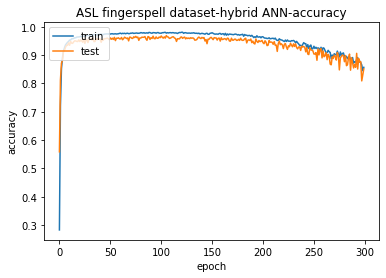

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ASL fingerspell dataset-hybrid ANN-accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

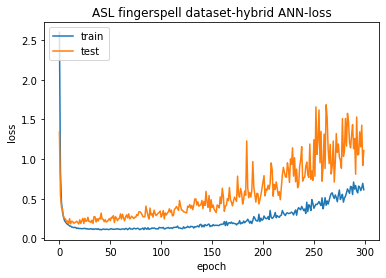

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ASL fingerspell dataset-hybrid ANN-loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()